
# Phylosymbiosis correlation plots

This notebook produces the plots showing phylosymbiosis correlations, per the methods in [Nishida et al](https://doi.org/10.1111/mec.14473). 

It uses the data generated by the [phylogenetic mantel correlation notebook](./phylogenetic_mantel_correlations.ipynb).

## Setup

### Package imports

In [1]:
require(ggplot2)
require(plyr)

Loading required package: ggplot2
Loading required package: plyr


### Filepaths

In [2]:
dist_fp <- '../phylosymbiosis/phylo.distance_table.csv'

plot_dir <- '../phylosymbiosis/plots'
dir.create(file.path(plot_dir))

Warning message in dir.create(file.path(plot_dir)):
“'../phylosymbiosis/plots' already exists”

## Import data

In [3]:
dist_df <- read.csv(dist_fp, header = TRUE)

dist_df$divergence <- dist_df$phylo / 2

dist_df <- na.exclude(dist_df)

subset to remove intra-species distances

In [4]:
levels(dist_df$host_1)

spp <- unique(c(levels(dist_df$host_1), 
                levels(dist_df$host_2)))

dist_df$host_1 <- factor(dist_df$host_1, levels=spp) 
dist_df$host_2 <- factor(dist_df$host_2, levels=spp)

[1] "Accipiter_cooperii"                "Accipiter_striatus"               
  [3] "Accipiter_tachiro"                 "Accipiter_trivirgatus"            
  [5] "Aceros_leucocephalus"              "Acinonyx_jubatus"                 
  [7] "Acrocephalus_arundinaceus"         "Acrocephalus_baeticatus"          
  [9] "Actitis_hypoleucos"                "Actitis_macularia"                
 [11] "Addax_nasomaculatus"               "Aegolius_acadicus"                
 [13] "Aepyceros_melampus"                "Aethia_pygmaea"                   
 [15] "Agapornis_fischeri"                "Agelaius_phoeniceus"              
 [17] "Ailuropoda_melanoleuca"            "Ailurus_fulgens"                  
 [19] "Aix_galericulata"                  "Aix_sponsa"                       
 [21] "Alauda_arvensis"                   "Alcelaphus_buselaphus"            
 [23] "Alisterus_scapularis"              "Alouatta_caraya"                  
 [25] "Alouatta_palliata"                 "Alouatta_pigra"                   
 [27] "Alouatta_seniculus"                "Amaurornis_akool"                 
 [29] "Amazilia_tzacatl"                  "Amazonetta_brasiliensis"          
 [31] "Amblycercus_holosericeus"          "Ammodramus_bairdii"               
 [33] "Ammodramus_maritimus"              "Ammotragus_lervia"                
 [35] "Anas_acuta"                        "Anas_aucklandica"                 
 [37] "Anas_crecca"                       "Anas_discors"                     
 [39] "Anas_flavirostris"                 "Anas_platyrhynchos"               
 [41] "Anas_rhynchotis"                   "Anodorhynchus_hyacinthinus"       
 [43] "Anous_stolidus"                    "Anser_caerulescens"               
 [45] "Anthornis_melanura"                "Anthreptes_collaris"              
 [47] "Anthropoides_paradiseus"           "Anthus_lineiventris"              
 [49] "Anthus_novaeseelandiae"            "Antidorcas_marsupialis"           
 [51] "Antilope_cervicapra"               "Antrozous_dubiaquercus"           
 [53] "Aonyx_cinerea"                     "Aplonis_panayensis"               
 [55] "Apteryx_australis"                 "Apteryx_australis_mantelli"       
 [57] "Apus_pacificus"                    "Aquila_heliaca"                   
 [59] "Ara_ararauna"                      "Ara_chloropterus"                 
 [61] "Aratinga_solstitialis"             "Arctictis_binturong"              
 [63] "Arctocephalus_forsteri"            "Arctocephalus_tropicalis"         
 [65] "Ardea_herodias"                    "Ardeotis_kori"                    
 [67] "Arenaria_interpres"                "Argusianus_argus"                 
 [69] "Artamus_leucorhynchus"             "Artibeus_glaucus"                 
 [71] "Artibeus_intermedius"              "Artibeus_jamaicensis"             
 [73] "Artibeus_lituratus"                "Artibeus_phaeotis"                
 [75] "Ateles_belzebuth"                  "Ateles_fusciceps"                 
 [77] "Ateles_geoffroyi"                  "Ateles_hybridus"                  
 [79] "Athene_cunicularia"                "Axis_axis"                        
 [81] "Axis_porcinus"                     "Aythya_fuligula"                  
 [83] "Balaenoptera_borealis"             "Baryphthengus_martii"             
 [85] "Batis_capensis"                    "Batrachostomus_auritus"           
 [87] "Bettongia_penicillata"             "Bombycilla_garrulus"              
 [89] "Bonasa_umbellus"                   "Bos_indicus"                      
 [91] "Bos_javanicus"                     "Bos_taurus"                       
 [93] "Boselaphus_tragocamelus"           "Branta_canadensis"                
 [95] "Bubo_lacteus"                      "Bubo_virginianus"                 
 [97] "Bubulcus_ibis"                     "Bucephala_clangula"               
 [99] "Buceros_bicornis"                  "Bucorvus_abyssinicus"             
[101] "Bucorvus_leadbeateri"              "Budorcas_taxicolor"               
[103] "Buteo_jamaicensis

In [5]:
dist_df <- subset(dist_df, host_1 != host_2)

### Data wrangling

Adding some filters so we can restrict displays to groups with plenty of samples

In [6]:
mam_orders <- count(subset(dist_df, 
                           (host_1_Class == 'Mammalia') &
                           (within_Order == 'True')),
                    'host_1_Order')

mam_orders <- mam_orders[mam_orders['freq'] > 50, 'host_1_Order']


ave_orders <- count(subset(dist_df, 
                           (host_1_Class == 'Aves') &
                           (within_Order == 'True')),
                    'host_1_Order')

ave_orders <- ave_orders[ave_orders['freq'] > 50, 'host_1_Order']

## Plots

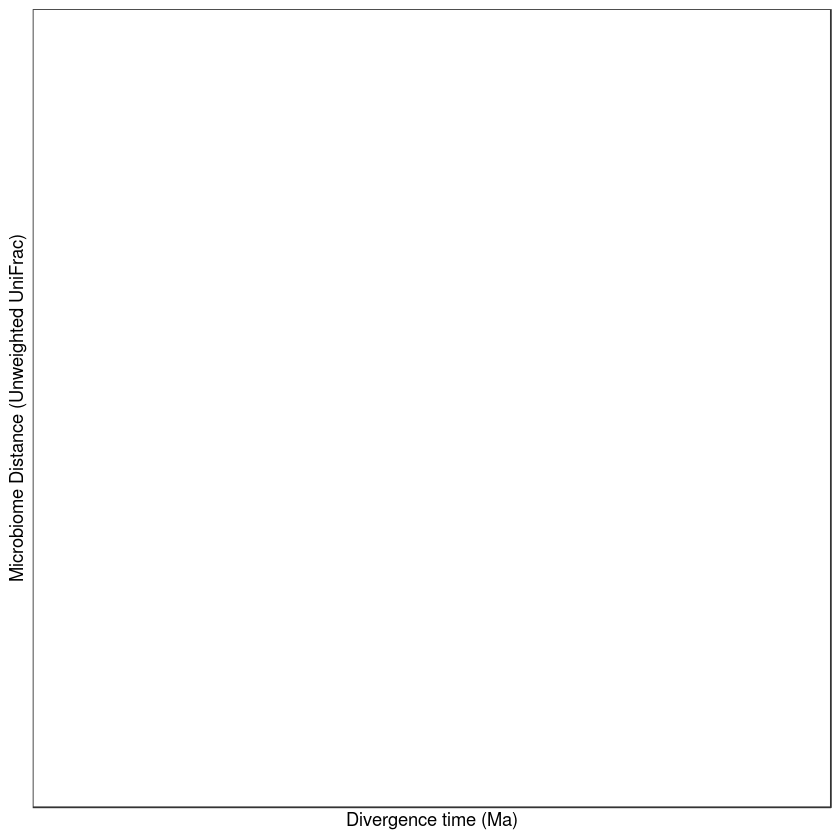

In [7]:
excl_classes = c('Mammalia','Aves')

phylo_hetero_uf_single <- ggplot(subset(dist_df, 
                                         (host_1_Class != 'Mammalia') &
                                         (host_2_Class != 'Mammalia') &
                                         (host_1_Class != 'Aves') &
                                         (host_2_Class != 'Aves')),
                        aes(x = divergence,
                            y = Jaccard)) +
  geom_point(alpha=0.05) + 
  geom_smooth(method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Unweighted UniFrac)") +
  theme(legend.position = "none")

# ggsave(phylo_mammals_uf_single, 
#        filename = file.path(plot_dir, 'phylo_mammals_uf_single.png'), 
#        width=5,
#        height=4)

phylo_hetero_uf_single

### Mammals

#### UniFrac

This plot shows the change in unweighted UniFrac distances across the mammalian phylogeny. 

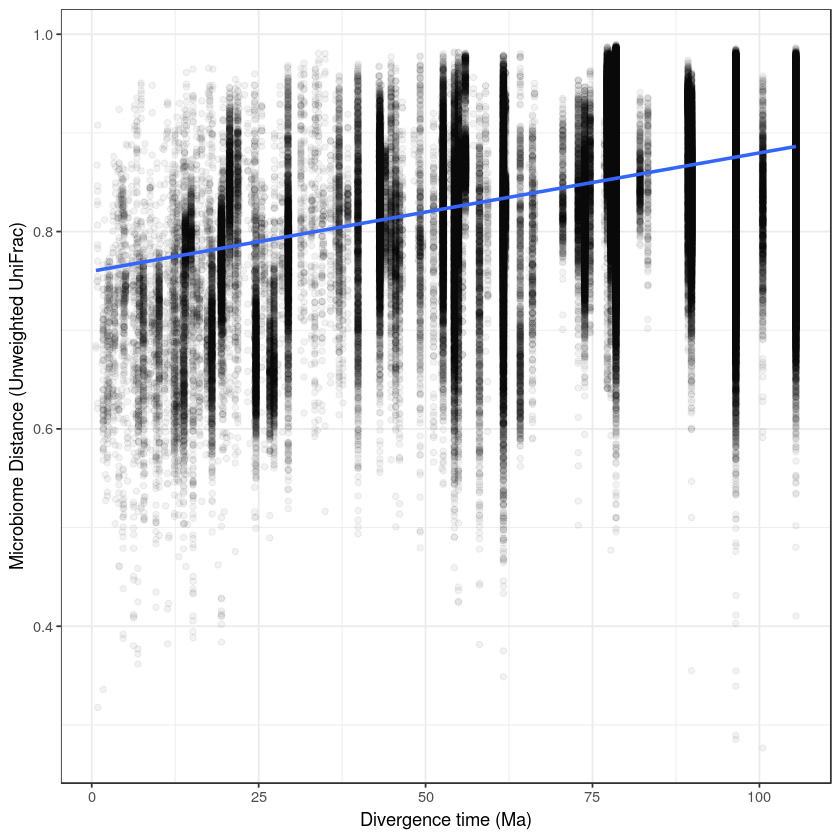

In [8]:
phylo_mammals_uf_single <- ggplot(subset(dist_df, (host_1_Class == 'Mammalia') &
                                        (divergence <= 150)),
                        aes(x = divergence,
                            y = Unweighted_UniFrac)) +
  geom_point(alpha=0.05) + 
  geom_smooth(method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Unweighted UniFrac)") +
  theme(legend.position = "none")

ggsave(phylo_mammals_uf_single, 
       filename = file.path(plot_dir, 'phylo_mammals_uf_single.png'), 
       width=5,
       height=4)

phylo_mammals_uf_single

This shows the same plot but with a broken stick model, separated at the KT boundary:

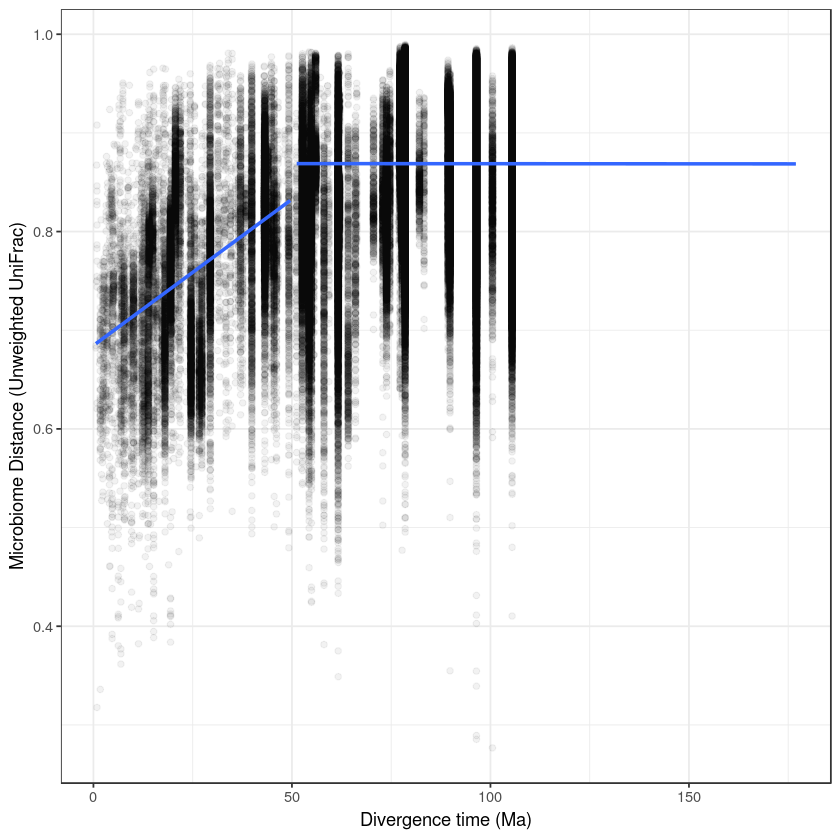

In [9]:
phylo_mammals_uf_kt <- ggplot(subset(dist_df, (host_1_Class == 'Mammalia') &
                                        (divergence <= 150)),
                        aes(x = divergence,
                            y = Unweighted_UniFrac)) +
  geom_point(alpha=0.05) + 
  geom_smooth(data = subset(dist_df, (host_1_Class == 'Mammalia') &
                              (divergence > 50)),
                     method='lm') + 
  geom_smooth(data = subset(dist_df, (host_1_Class == 'Mammalia') &
                              (divergence <= 50)),
                     method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Unweighted UniFrac)") +
  theme(legend.position = "none")

ggsave(phylo_mammals_uf_kt, 
       filename = file.path(plot_dir, 'phylo_mammals_uf_kt.png'), 
       width=5,
       height=4)

phylo_mammals_uf_kt

Here's a similar plot, but now separated to within- vs between-order distances

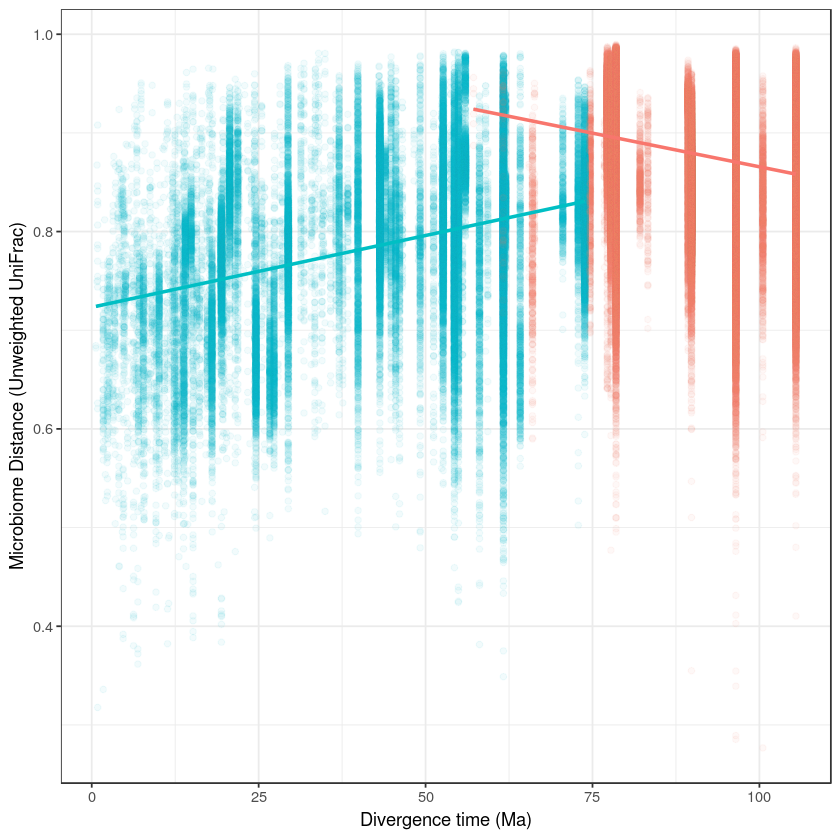

In [10]:

phylo_mammals_uf_order <- ggplot(subset(dist_df, (host_1_Class == 'Mammalia') &
                                        (divergence <= 150)),
                        aes(x = divergence,
                            y = Unweighted_UniFrac,
                            color = factor(within_Order))) +
  geom_point(alpha=0.05) + 
  geom_smooth(method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Unweighted UniFrac)") +
  theme(legend.position = "none")

ggsave(phylo_mammals_uf_order, 
       filename = file.path(plot_dir, 'phylo_mammals_uf_order.png'), 
       width=5,
       height=4)

phylo_mammals_uf_order

Now we'll plot each order individually, selecting for just those orders that have at least 50 pairwise comparisons (more than 7 samples):

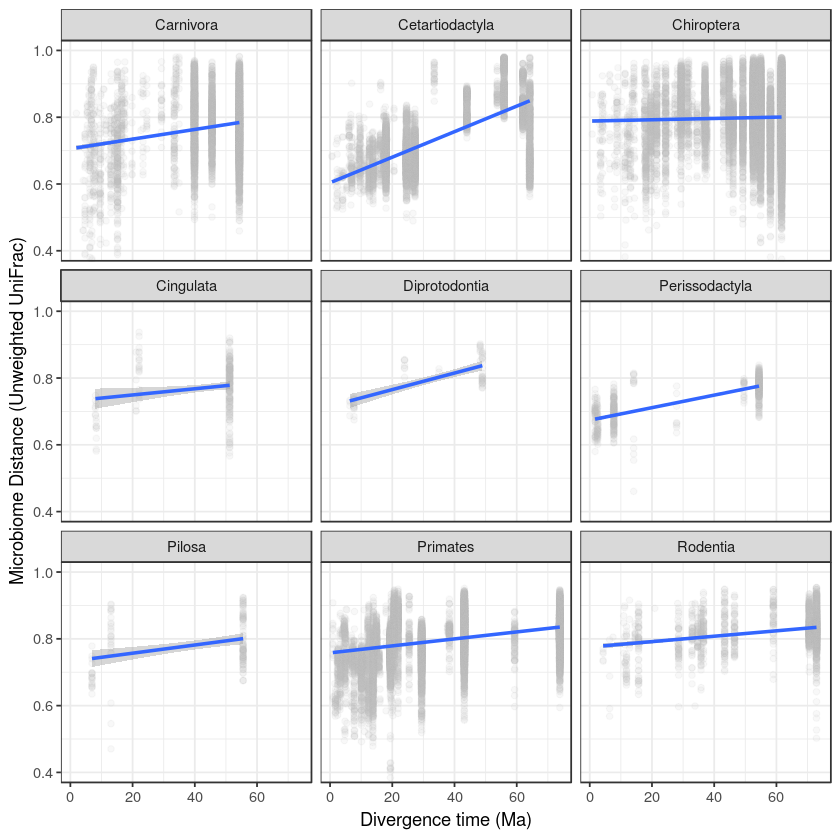

In [11]:
phylo_mammals_uf_perorder <- ggplot(subset(dist_df, 
                                   (host_1_Class == 'Mammalia') &
                                   (within_Order == 'True') &
                                   (host_1_Order %in% mam_orders)),
                        aes(x = divergence,
                            y = Unweighted_UniFrac)) +
  geom_point(alpha=0.1, color = 'grey') + 
  geom_smooth(method='lm') + 
  theme_bw() + 
  facet_wrap(~ host_1_Order) +  
  coord_cartesian(ylim=c(0.5, 1)) + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Unweighted UniFrac)") +
  theme(legend.position = "none")

ggsave(phylo_mammals_uf_perorder, 
       filename = file.path(plot_dir, 'phylo_mammals_uf_perorder.png'), 
       width=8,
       height=6)


phylo_mammals_uf_perorder

### Jaccard

The binary Jaccard distance depends on the number of shared ASVs between samples. Because it uses exact sequence matching rather than phylogenetic proximity, it is very sensitive to recent bacterial evolution -- if a cospeciation even between a host and a microbe corresponds to a single SNP in the given region of 16S, it will have a large effect on the Jaccard distance but not much effect on the UniFrac distance. Consequently, the Jaccard metric should be more sensitive to recent bacterial evolution, and show a stronger signal of phylosymbiosis at more recent timescales. 

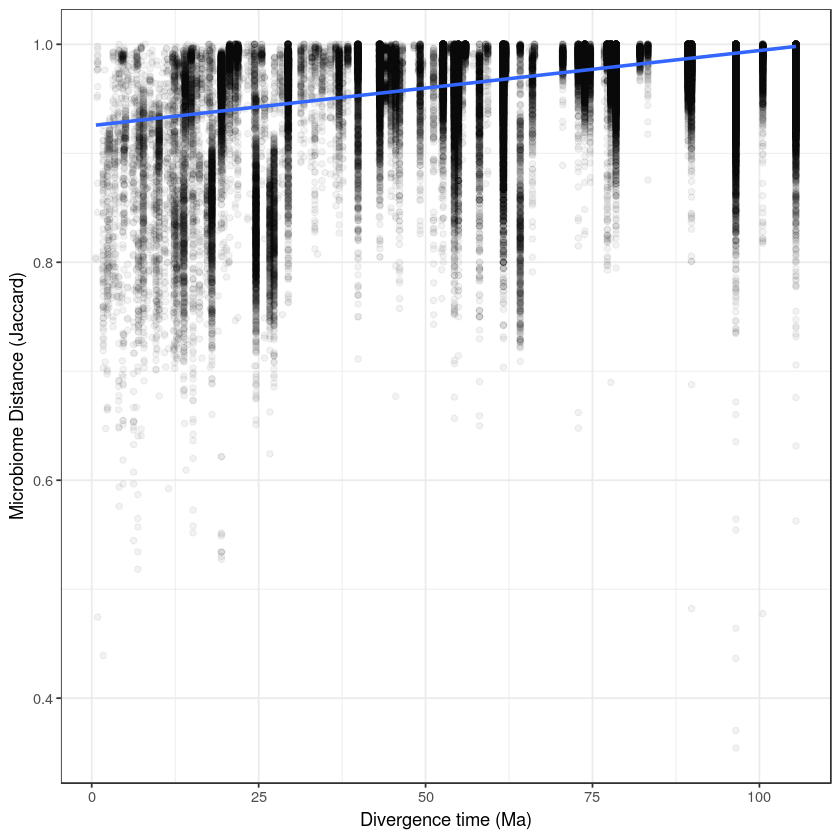

In [12]:
phylo_mammals_jac_single <- ggplot(subset(dist_df, (host_1_Class == 'Mammalia') &
                                        (divergence <= 150)),
                        aes(x = divergence,
                            y = Jaccard)) +
  geom_point(alpha=0.05) + 
  geom_smooth(method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Jaccard)") +
  theme(legend.position = "none")

ggsave(phylo_mammals_jac_single, 
       filename = file.path(plot_dir, 'phylo_mammals_jac_single.png'), 
       width=5,
       height=4)

phylo_mammals_jac_single

This shows the same plot but with a broken stick model, separated at the KT boundary:

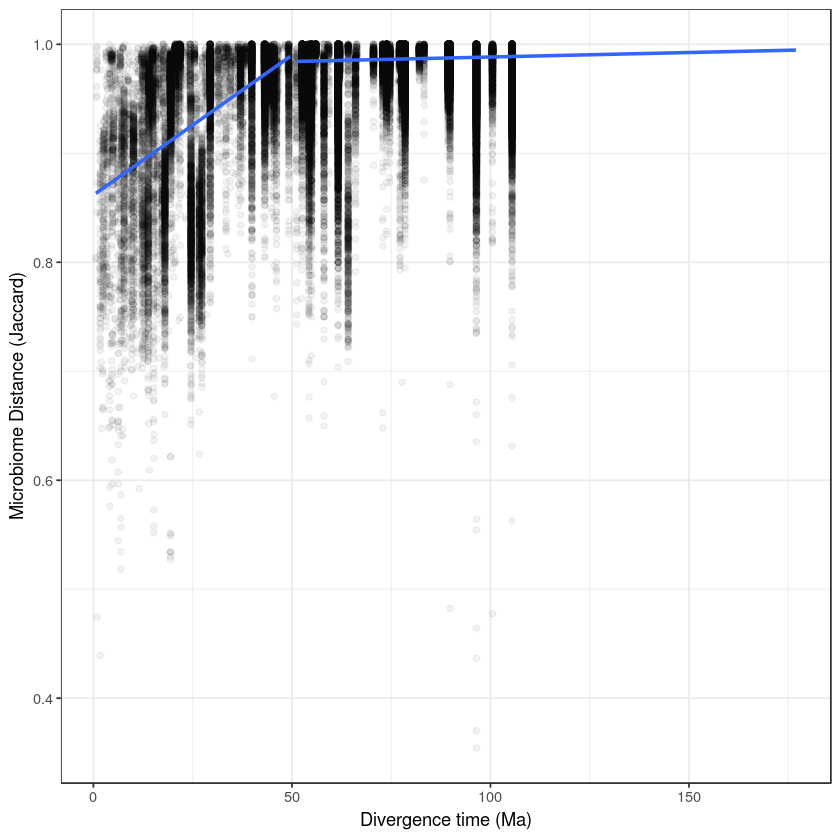

In [13]:
phylo_mammals_jac_kt <- ggplot(subset(dist_df, (host_1_Class == 'Mammalia') &
                                        (divergence <= 150)),
                        aes(x = divergence,
                            y = Jaccard)) +
  geom_point(alpha=0.05) + 
  geom_smooth(data = subset(dist_df, (host_1_Class == 'Mammalia') &
                              (divergence > 50)),
                     method='lm') + 
  geom_smooth(data = subset(dist_df, (host_1_Class == 'Mammalia') &
                              (divergence <= 50)),
                     method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Jaccard)") +
  theme(legend.position = "none")

ggsave(phylo_mammals_jac_kt, 
       filename = file.path(plot_dir, 'phylo_mammals_jac_kt.png'), 
       width=5,
       height=4)

phylo_mammals_jac_kt

Here's a similar plot, but now separated to within- vs between-order distances

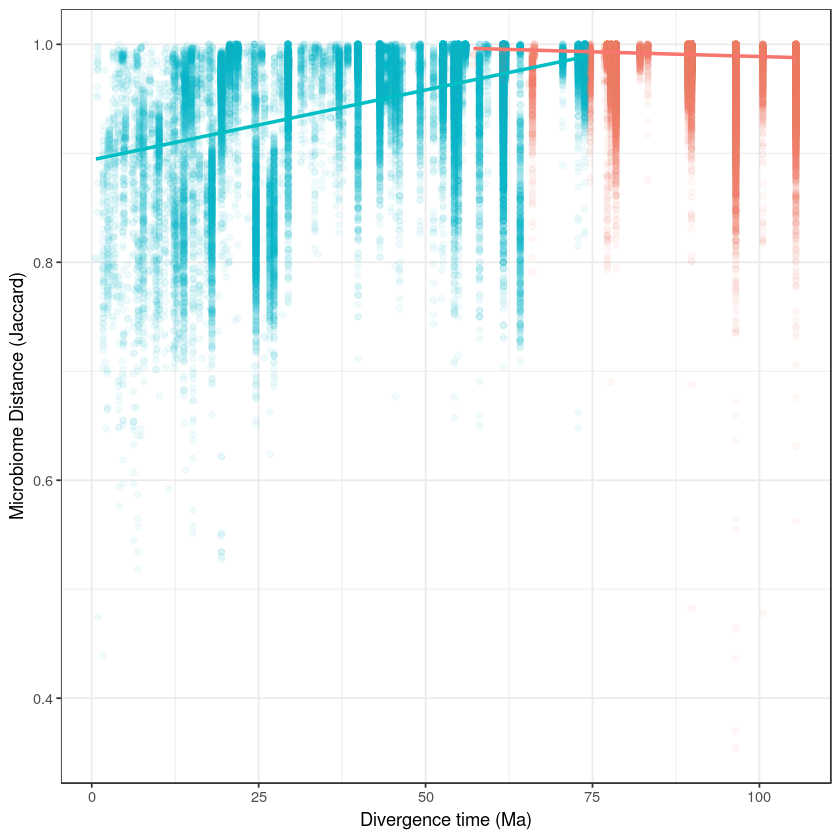

In [14]:

phylo_mammals_jac_order <- ggplot(subset(dist_df, (host_1_Class == 'Mammalia') &
                                        (divergence <= 150)),
                        aes(x = divergence,
                            y = Jaccard,
                            color = factor(within_Order))) +
  geom_point(alpha=0.05) + 
  geom_smooth(method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Jaccard)") +
  theme(legend.position = "none")

ggsave(phylo_mammals_jac_order, 
       filename = file.path(plot_dir, 'phylo_mammals_jac_order.png'), 
       width=5,
       height=4)

phylo_mammals_jac_order

Plotting Jaccard phylosymbiosis per mammalian order:

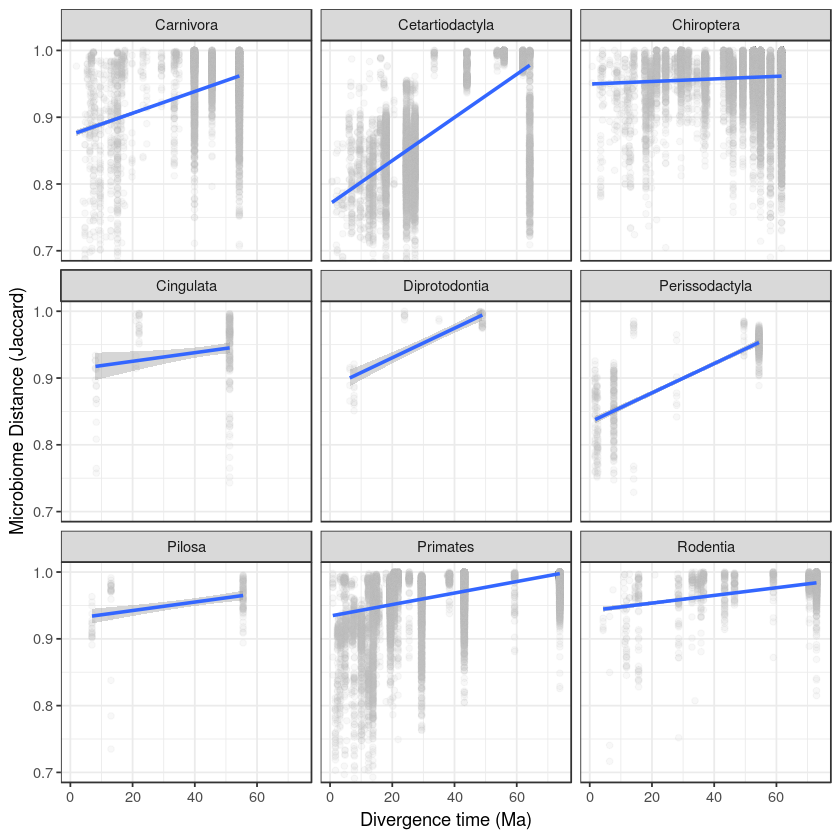

In [31]:
phylo_mammals_jac_perorder <- ggplot(subset(dist_df, 
                                   (host_1_Class == 'Mammalia') &
                                   (within_Order == 'True') &
                                   (host_1_Order %in% mam_orders)),
                        aes(x = divergence,
                            y = Jaccard)) +
  geom_point(alpha=0.1, color = 'grey') + 
  geom_smooth(method='lm') + 
  theme_bw() + 
  facet_wrap(~ host_1_Order) +  
  coord_cartesian(ylim=c(0.7, 1)) + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Jaccard)") +
  theme(legend.position = "none")

ggsave(phylo_mammals_jac_perorder, 
       filename = file.path(plot_dir, 'phylo_mammals_jac_perorder.png'), 
       width=5,
       height=4)


phylo_mammals_jac_perorder

## Birds

We'll repeat all of the above plot for mammals, but for birds:

#### UniFrac

This plot shows the change in unweighted UniFrac distances across the mammalian phylogeny. 

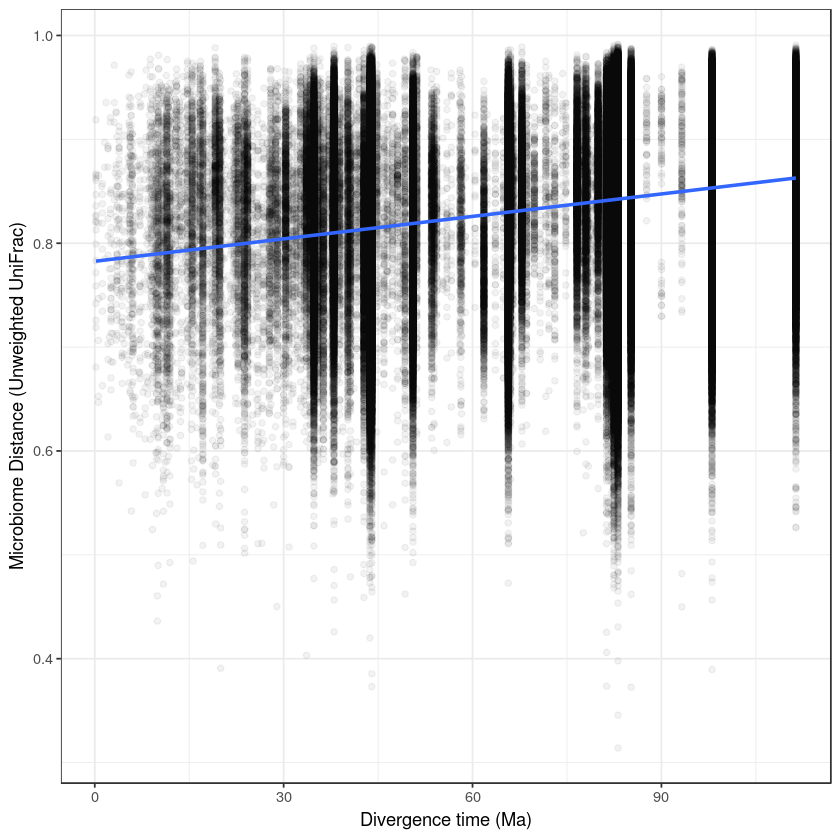

In [16]:
phylo_aves_uf_single <- ggplot(subset(dist_df, (host_1_Class == 'Aves') &
                                        (divergence <= 150)),
                        aes(x = divergence,
                            y = Unweighted_UniFrac)) +
  geom_point(alpha=0.05) + 
  geom_smooth(method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Unweighted UniFrac)") +
  theme(legend.position = "none")

ggsave(phylo_aves_uf_single, 
       filename = file.path(plot_dir, 'phylo_aves_uf_single.png'), 
       width=5,
       height=4)

phylo_aves_uf_single

This shows the same plot but with a broken stick model, separated at the KT boundary:

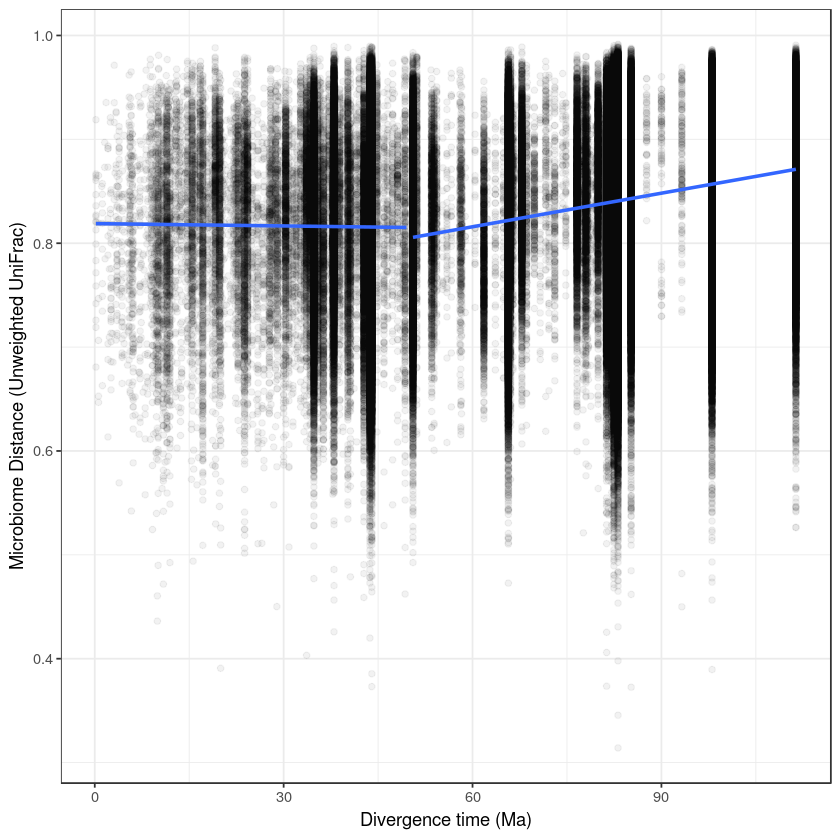

In [17]:
phylo_aves_uf_kt <- ggplot(subset(dist_df, (host_1_Class == 'Aves') &
                                        (divergence <= 150)),
                        aes(x = divergence,
                            y = Unweighted_UniFrac)) +
  geom_point(alpha=0.05) + 
  geom_smooth(data = subset(dist_df, (host_1_Class == 'Aves') &
                              (divergence > 50)),
                     method='lm') + 
  geom_smooth(data = subset(dist_df, (host_1_Class == 'Aves') &
                              (divergence <= 50)),
                     method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Unweighted UniFrac)") +
  theme(legend.position = "none")

ggsave(phylo_aves_uf_kt, 
       filename = file.path(plot_dir, 'phylo_aves_uf_kt.png'), 
       width=5,
       height=4)

phylo_aves_uf_kt

Here's a similar plot, but now separated to within- vs between-order distances

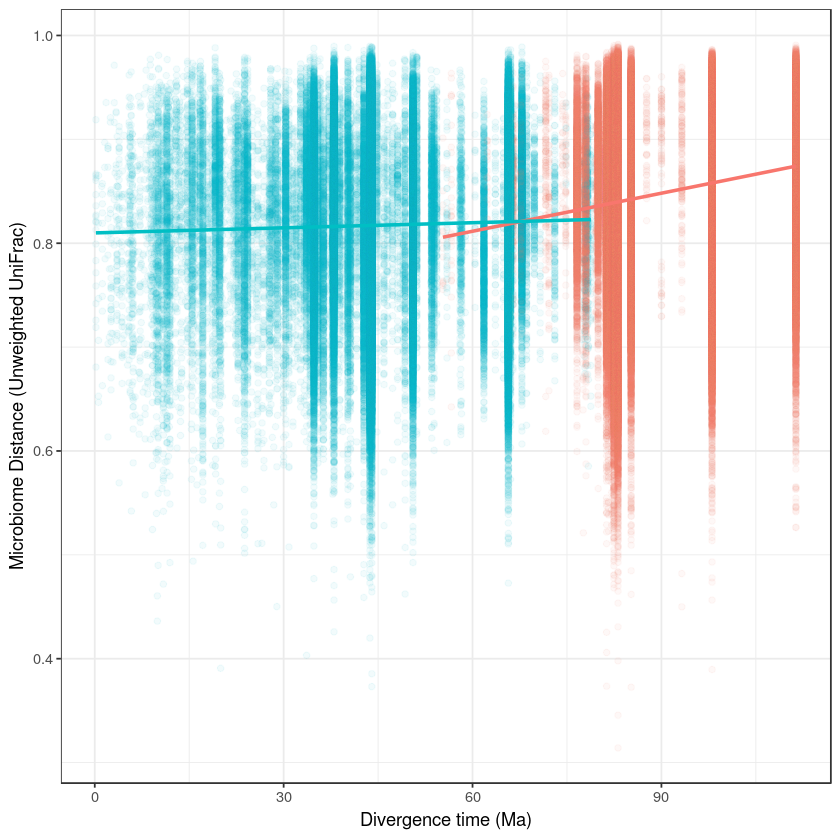

In [18]:

phylo_aves_uf_order <- ggplot(subset(dist_df, (host_1_Class == 'Aves') &
                                        (divergence <= 150)),
                        aes(x = divergence,
                            y = Unweighted_UniFrac,
                            color = factor(within_Order))) +
  geom_point(alpha=0.05) + 
  geom_smooth(method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Unweighted UniFrac)") +
  theme(legend.position = "none")

ggsave(phylo_aves_uf_order, 
       filename = file.path(plot_dir, 'phylo_aves_uf_order.png'), 
       width=5,
       height=4)

phylo_aves_uf_order

Per order:

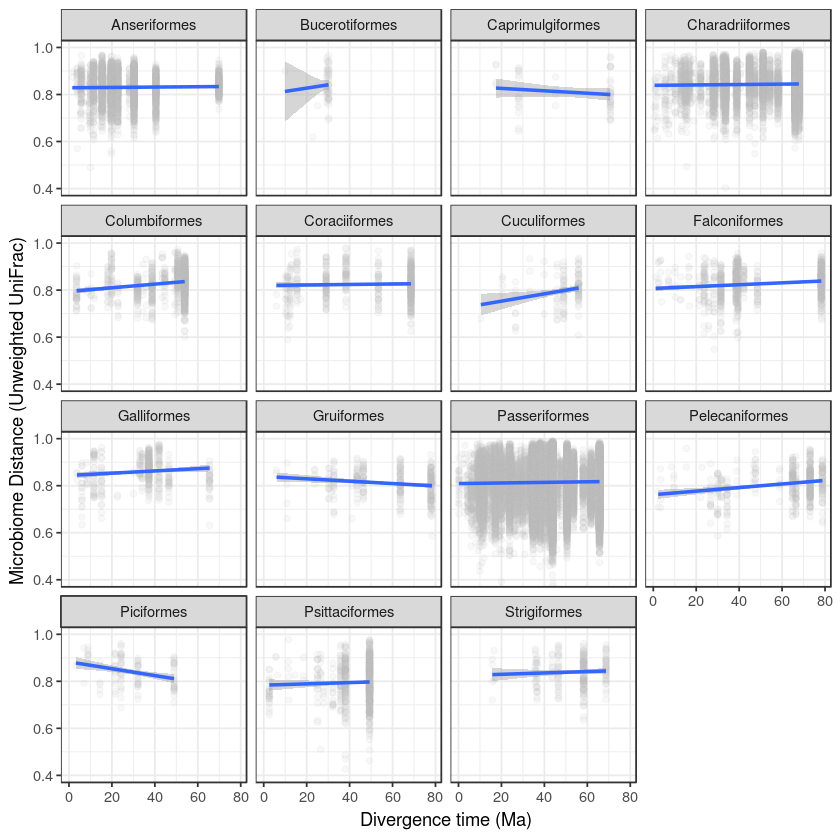

In [19]:
phylo_aves_uf_perorder <- ggplot(subset(dist_df, 
                                   (host_1_Class == 'Aves') &
                                   (within_Order == 'True') &
                                   (host_1_Order %in% ave_orders)),
                        aes(x = divergence,
                            y = Unweighted_UniFrac)) +
  geom_point(alpha=0.1, color = 'grey') + 
  geom_smooth(method='lm') + 
  theme_bw() + 
  facet_wrap(~ host_1_Order) +  
  coord_cartesian(ylim=c(0.4, 1)) + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Unweighted UniFrac)") +
  theme(legend.position = "none")

ggsave(phylo_aves_uf_perorder, 
       filename = file.path(plot_dir, 'phylo_aves_uf_perorder.png'), 
       width=8,
       height=6)


phylo_aves_uf_perorder

### Jaccard

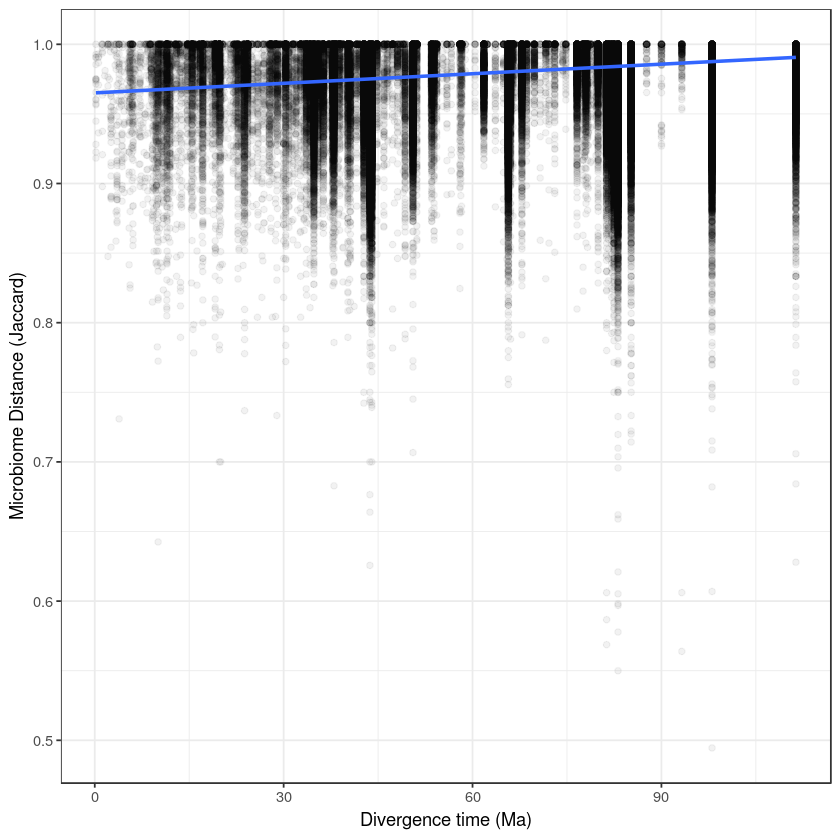

In [20]:
phylo_aves_jac_single <- ggplot(subset(dist_df, (host_1_Class == 'Aves') &
                                        (divergence <= 150)),
                        aes(x = divergence,
                            y = Jaccard)) +
  geom_point(alpha=0.05) + 
  geom_smooth(method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Jaccard)") +
  theme(legend.position = "none")

ggsave(phylo_aves_jac_single, 
       filename = file.path(plot_dir, 'phylo_aves_jac_single.png'), 
       width=5,
       height=4)

phylo_aves_jac_single

This shows the same plot but with a broken stick model, separated at the KT boundary:

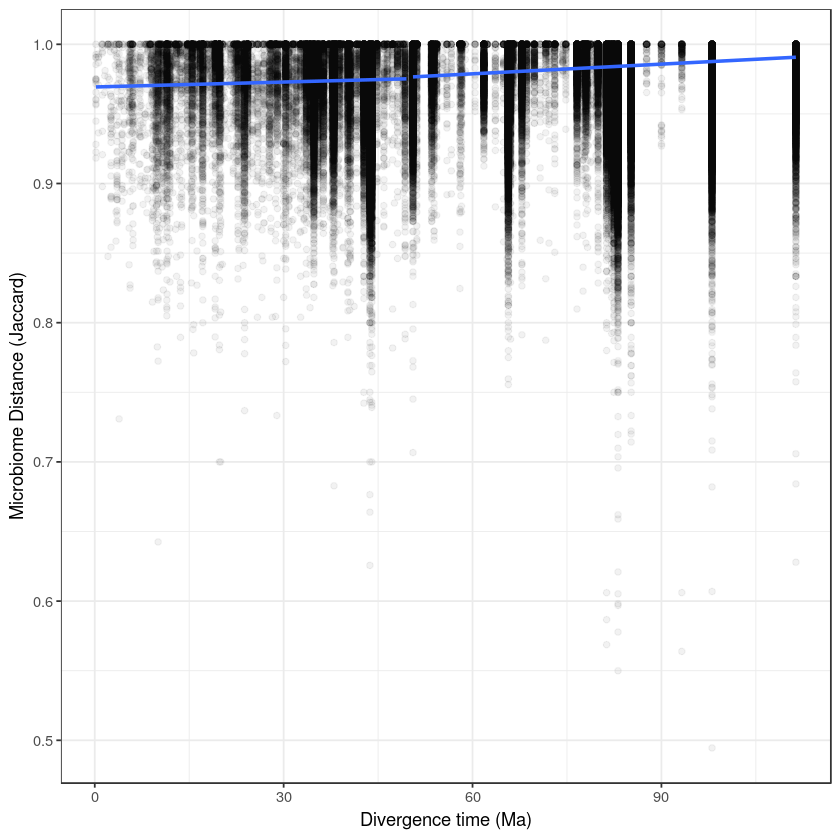

In [21]:
phylo_aves_jac_kt <- ggplot(subset(dist_df, (host_1_Class == 'Aves') &
                                        (divergence <= 150)),
                        aes(x = divergence,
                            y = Jaccard)) +
  geom_point(alpha=0.05) + 
  geom_smooth(data = subset(dist_df, (host_1_Class == 'Aves') &
                              (divergence > 50)),
                     method='lm') + 
  geom_smooth(data = subset(dist_df, (host_1_Class == 'Aves') &
                              (divergence <= 50)),
                     method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Jaccard)") +
  theme(legend.position = "none")

ggsave(phylo_aves_jac_kt, 
       filename = file.path(plot_dir, 'phylo_aves_jac_kt.png'), 
       width=5,
       height=4)

phylo_aves_jac_kt

Here's a similar plot, but now separated to within- vs between-order distances

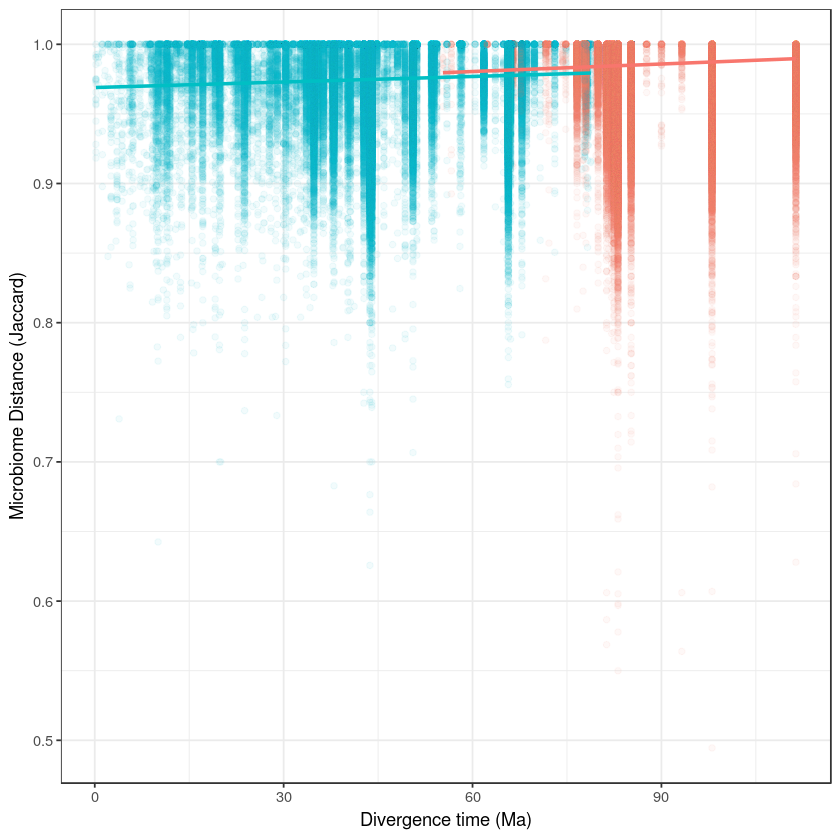

In [22]:

phylo_aves_jac_order <- ggplot(subset(dist_df, (host_1_Class == 'Aves') &
                                        (divergence <= 150)),
                        aes(x = divergence,
                            y = Jaccard,
                            color = factor(within_Order))) +
  geom_point(alpha=0.05) + 
  geom_smooth(method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Jaccard)") +
  theme(legend.position = "none")

ggsave(phylo_aves_jac_order, 
       filename = file.path(plot_dir, 'phylo_aves_jac_order.png'), 
       width=5,
       height=4)

phylo_aves_jac_order

The paleognaths:

In [23]:
paleognathae = c('Rheiformes',
                 'Struthioniformes',
                 'Tinamiformes',
                 'Casuariiformes')

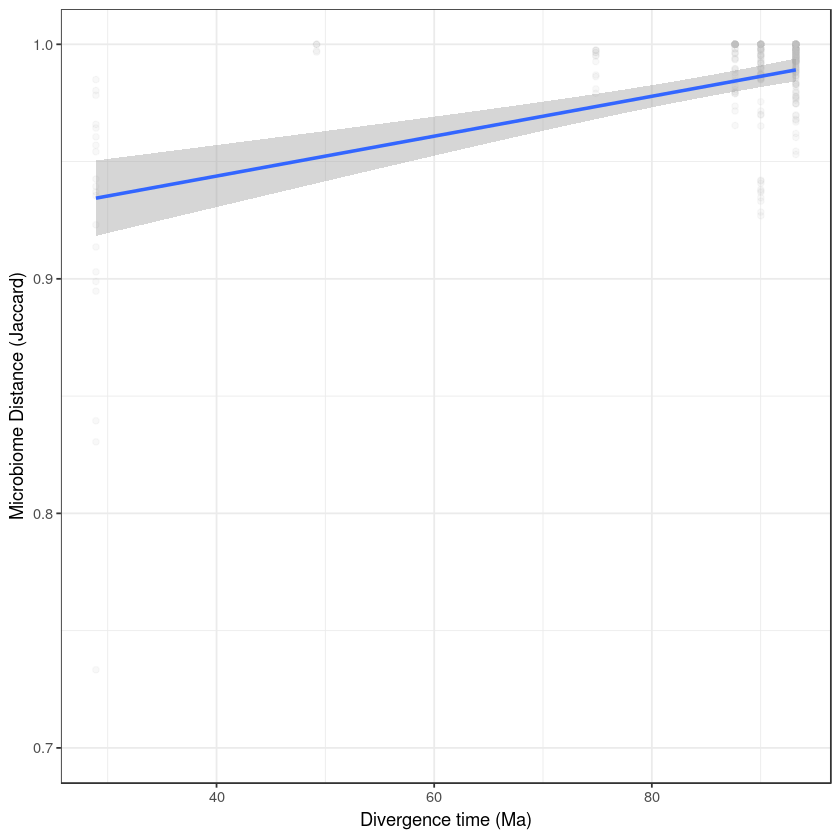

In [24]:
phylo_aves_jac_paleognath <- ggplot(subset(dist_df, 
                                   (host_1_Class == 'Aves') &
                                   (host_1_Order %in% paleognathae) &
                                   (host_2_Order %in% paleognathae)),
                        aes(x = divergence,
                            y = Jaccard)) +
  geom_point(alpha=0.1, color = 'grey') + 
  geom_smooth(method='lm') + 
  theme_bw() + 
  coord_cartesian(ylim=c(0.7, 1)) + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Jaccard)") +
  theme(legend.position = "none")

# ggsave(phylo_aves_jac_perorder, 
#        filename = file.path(plot_dir, 'phylo_aves_jac_perorder.png'), 
#        width=8,
#        height=6)


phylo_aves_jac_paleognath

Not really enough sampling to get a great idea of whether there's a strong phylosymbiotic signal. 

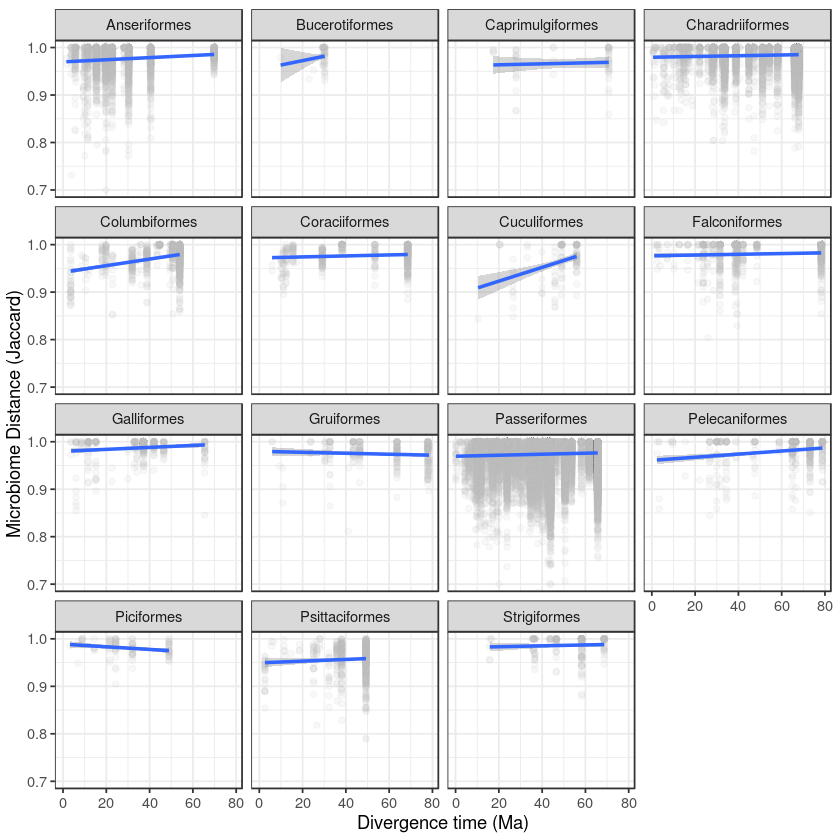

In [25]:
phylo_aves_jac_perorder <- ggplot(subset(dist_df, 
                                   (host_1_Class == 'Aves') &
                                   (within_Order == 'True') &
                                   (host_1_Order %in% ave_orders)),
                        aes(x = divergence,
                            y = Jaccard)) +
  geom_point(alpha=0.1, color = 'grey') + 
  geom_smooth(method='lm') + 
  theme_bw() + 
  facet_wrap(~ host_1_Order) +  
  coord_cartesian(ylim=c(0.7, 1)) + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Jaccard)") +
  theme(legend.position = "none")

ggsave(phylo_aves_jac_perorder, 
       filename = file.path(plot_dir, 'phylo_aves_jac_perorder.png'), 
       width=8,
       height=6)


phylo_aves_jac_perorder

## Both

### UniFrac

Plotting metrics for both birds and mammals:

In [26]:
class_colors <- c("Aves" = "#EACB47",
                  "Mammalia" = "#6a3d9a")

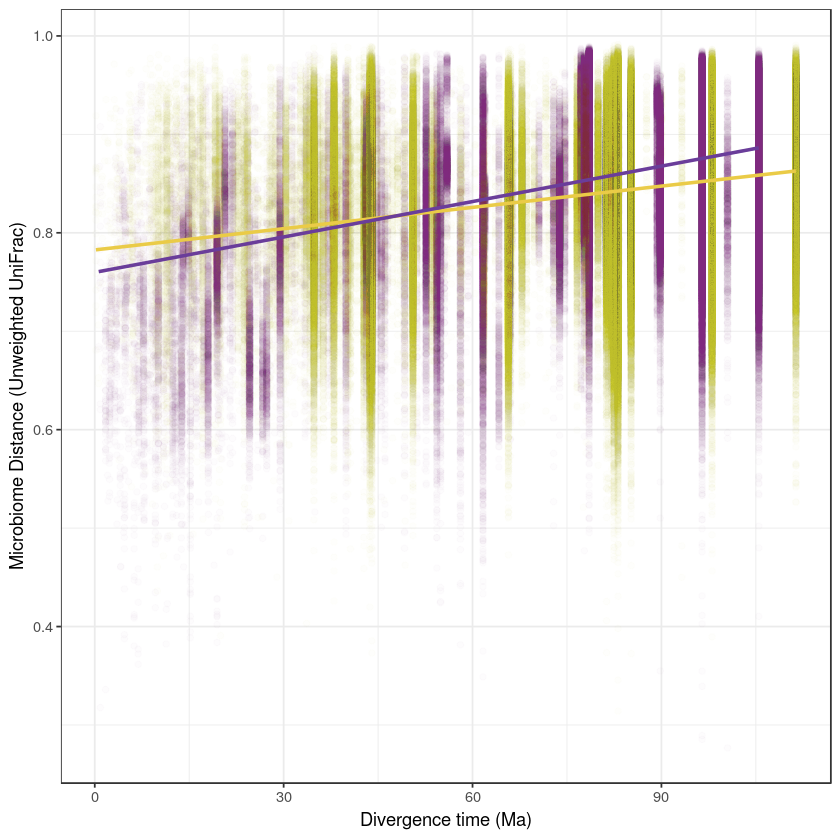

In [27]:
phylo_both_uf_single <- ggplot(subset(dist_df, 
                                      (within_Class == 'True') &
                                      (divergence <= 150)),
                        aes(x = divergence,
                            y = Unweighted_UniFrac,
                            color = host_1_Class)) +
  geom_point(alpha=0.01) + 
  scale_color_manual(values = class_colors) +
  geom_smooth(data = subset(dist_df, (divergence <= 150)),
                     method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Unweighted UniFrac)") +
  theme(legend.position = "none")

ggsave(phylo_both_uf_single, 
       filename = file.path(plot_dir, 'phylo_both_uf_single.png'), 
       width=5,
       height=4)


phylo_both_uf_single

With intra- vs inter-order distances:

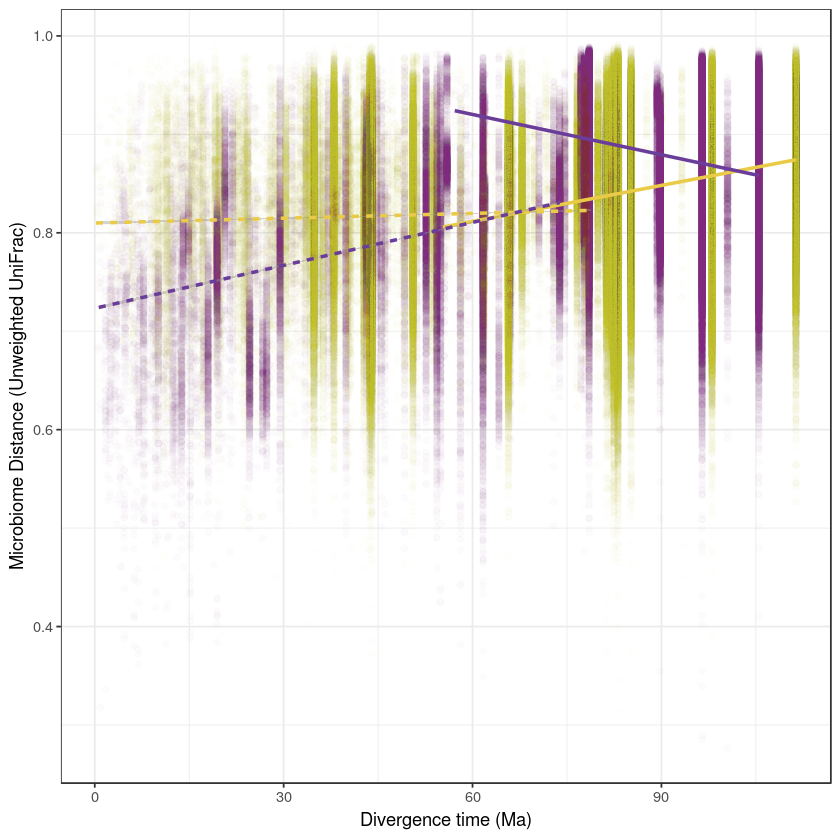

In [34]:
phylo_both_uf_order <- ggplot(subset(dist_df, 
                                      (within_Class == 'True') &
                                      (divergence <= 150)),
                        aes(x = divergence,
                            y = Unweighted_UniFrac,
                            color = host_1_Class)) +
  geom_point(alpha=0.01) + 
  scale_color_manual(values = class_colors) +
  geom_smooth(data = subset(dist_df, (divergence <= 150)),
              aes(linetype = factor(within_Order)),
              method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Unweighted UniFrac)") +
  theme(legend.position = "none")

ggsave(phylo_both_uf_order, 
       filename = file.path(plot_dir, 'phylo_both_uf_order.png'), 
       width=5,
       height=4)


phylo_both_uf_order

### Jaccard

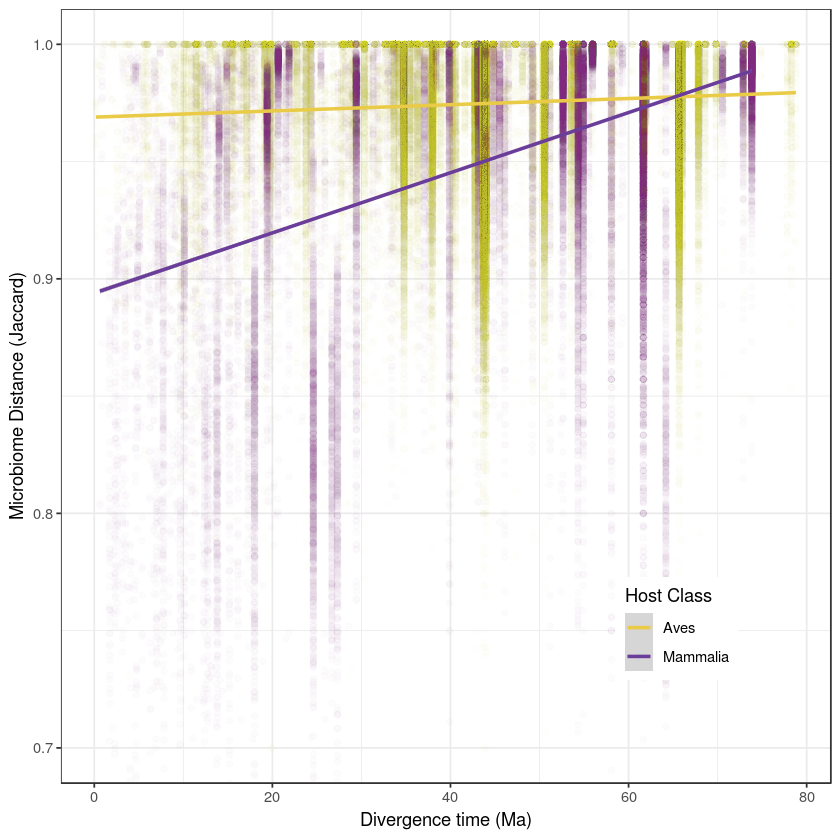

In [29]:
phylo_both_jac_single <- ggplot(subset(dist_df, 
                                      (within_Class == 'True') &
                                      (within_Order == 'True')),
                        aes(x = divergence,
                            y = Jaccard,
                            color = host_1_Class)) +
  geom_point(alpha=0.01) + 
  scale_color_manual(values = class_colors,
                     name = 'Host Class') +
  geom_smooth(method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Jaccard)") +
  theme(legend.position = c(0.8,0.2 )) +
  coord_cartesian(ylim=c(0.7, 1))

ggsave(phylo_both_jac_single, 
       filename = file.path(plot_dir, 'phylo_both_jac_single.png'), 
       width=5,
       height=4)


phylo_both_jac_single

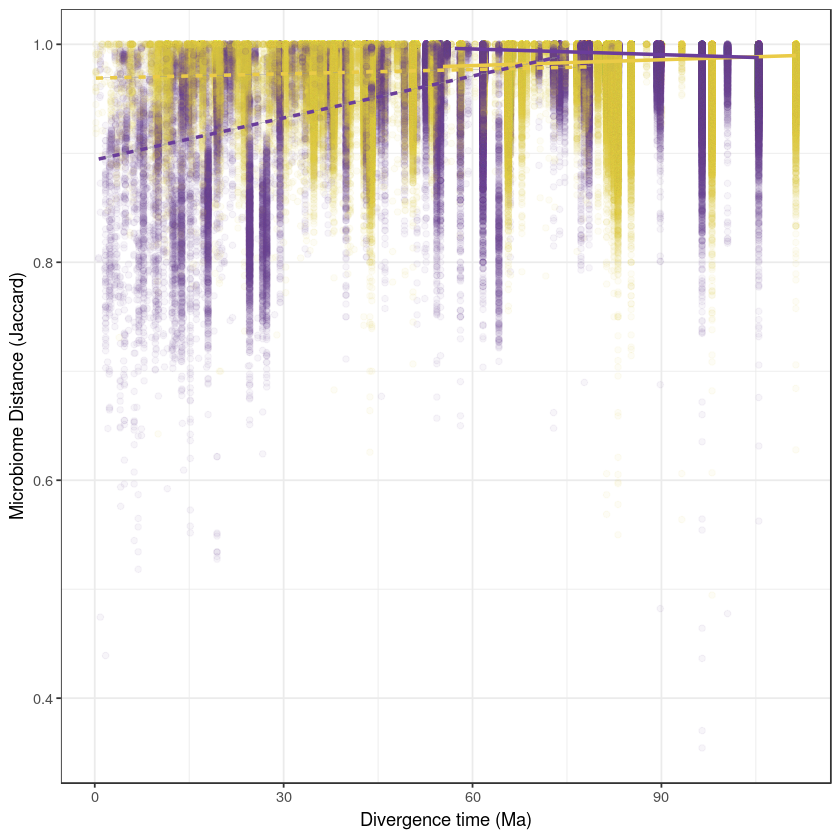

In [30]:
phylo_both_jac_order <- ggplot(subset(dist_df, 
                                      (within_Class == 'True') &
                                      (divergence <= 150)),
                        aes(x = divergence,
                            y = Jaccard,
                            color = host_1_Class)) +
  geom_point(alpha=0.05) + 
  scale_color_manual(values = class_colors) +
  geom_smooth(data = subset(dist_df, (divergence <= 150)),
              aes(linetype = factor(within_Order)),
              method='lm') + 
  theme_bw() + 
  labs(x = "Divergence time (Ma)",
       y = "Microbiome Distance (Jaccard)") +
  theme(legend.position = "none")

ggsave(phylo_both_jac_order, 
       filename = file.path(plot_dir, 'phylo_both_jac_order.png'), 
       width=5,
       height=4)


phylo_both_jac_order